### This is jupyter notebook

### 图像操作

In [3]:
print('opencv')

opencv


In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img=cv.imread('./target.png')

In [5]:
img[:3,:1,:]

array([[[126, 136, 223]],

       [[128, 138, 225]],

       [[128, 138, 225]]], dtype=uint8)

In [6]:
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
#将图像显示包装到一个方法中进行调用,path为图像路径，name为名字
def cv_show(name,img):
    cv.imshow(name,img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [8]:
cv_show('target',img)

In [9]:
img.shape #获取图像的属性(h,w,c)，3表示为彩色图（RBG，在opencv中为BGR格式）

(969, 1020, 3)

In [50]:
img=cv.imread('./target.png',cv.IMREAD_GRAYSCALE) #灰度图读取
img

array([[167, 167, 170, ..., 175, 179, 179],
       [169, 168, 170, ..., 175, 174, 175],
       [169, 167, 169, ..., 176, 176, 176],
       ...,
       [ 53,  56,  53, ..., 103, 101,  95],
       [ 50,  46,  46, ..., 112,  96,  90],
       [225, 225, 227, ..., 217, 217, 218]], dtype=uint8)

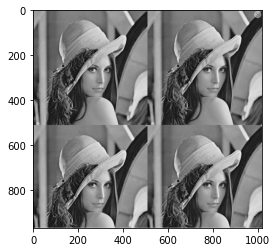

In [52]:
import matplotlib.pyplot as plt
cv_show('gray',img) #灰度图展示
# img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,'gray')
plt.show()


In [12]:
cv.imwrite('./myimg.png',img) #图像保存

True

In [13]:
type(img) #图片数据格式

numpy.ndarray

In [14]:
img.size #显示像素点个数

2965140

In [15]:
img.dtype #图片数据类型

dtype('uint8')

#### 图片截取

In [32]:
import cv2 as cv
img = cv.imread('./target.png')
person = img[:100,:10] #h为100，w为10
cv_show('p',person)

In [17]:
img[:10,:1]

array([[[126, 136, 223]],

       [[128, 138, 225]],

       [[128, 138, 225]],

       [[123, 137, 225]],

       [[119, 135, 224]],

       [[116, 134, 225]],

       [[114, 133, 224]],

       [[109, 132, 224]],

       [[109, 132, 224]],

       [[109, 132, 224]]], dtype=uint8)

In [18]:
b, g, r = cv.split(img) #拆分图片

In [31]:
cv_show('b',b)

In [20]:
b.shape

(969, 1020)

In [21]:
img=cv.merge((b,g,r)) #合并图片
img.shape

(969, 1020, 3)

#### 边界填充

In [59]:
import matplotlib.pyplot as plt
import cv2 as cv
img=cv.imread('./target.png',cv.IMREAD_GRAYSCALE)
img=cv.cvtColor(img,cv.COLOR_BGR2RGB) # 改变图片颜色通道
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)
replicate = cv.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv.BORDER_REPLICATE) #复制法填充，直接复制边缘像素点填充
reflect = cv.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv.BORDER_REFLECT) #反射法填充
reflect101 = cv.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv.BORDER_REFLECT_101) #反射法填充
wrap = cv.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv.BORDER_WRAP) #外包装法填充
constant = cv.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv.BORDER_CONSTANT,0) #常量法填充

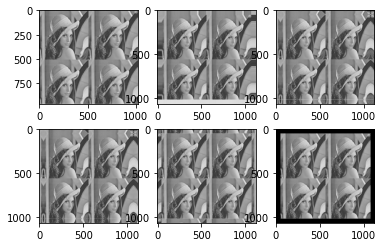

In [60]:
# b,g,r=cv.split(img)
# img =cv.merge((r,g,b))
plt.subplot(231), plt.imshow(img)
plt.subplot(232), plt.imshow(cv.copyMakeBorder(img,50,50,50,50,borderType=cv.BORDER_REPLICATE))
plt.subplot(233), plt.imshow(reflect)
plt.subplot(234), plt.imshow(reflect101)
plt.subplot(235), plt.imshow(wrap)
plt.subplot(236), plt.imshow(constant)
plt.show()

#### 图像阈值操作

**ret, dst = cv.threshold(src,thresh,maxval,type)**(通常情况下thresh取127，maxval取255)
* src：输入图，只能输入单通道图像，通常来说为灰度图
* dst：输出图
* thresh：阈值
* maxval：当像素值超过了阈值（小于阈值，根据type来决定），所赋予的值
* type：二值化操作的类型包含5类型:    
    1. cv2.THRESH_BINARY 超过阈值部分取maxval，否则取0
    2. cv2.THRESH_BINARY_INV THRESH_BINARY的反转
    3. cv2.THRESH_TRUNC 大于阈值部分设为阈值，否则不变
    4. cv2.THRESH_TOZERO 大于阈值部分不变，否则设为0
    5. cv2.THRESH_TOZERO_INV THRESH_TOZERO的反转

#### 图像处理

### 视频操作

In [93]:
import numpy as np
import cv2 as cv
vc = cv.VideoCapture('D:/Workspace/data/test.mp4')

In [94]:
# 判读视频是否能够打开
if vc.isOpened():
    open, frame = vc.read()
else:
    open = False

In [95]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret ==True:
        # video = cv.cvtColor(frame, cv.COLOR_BGR2BGRA) #视频颜色修改
        video = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        cv.imshow('car',video)
        if cv.waitKey(10) & 0xFF == 27:
            break
vc.release()
cv.destroyAllWindows()

In [86]:
# 从摄像头捕捉视频
import cv2 as cv
import numpy as np

cap=cv.VideoCapture(0) # 参数为0表示为第一台摄像机
while True:
    ret, frame = cap.read()
    video = cv.cvtColor(frame, cv.COLOR_BGR2BGRA)
    # video = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv.imshow('window',video)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

In [105]:
import cv2 as cv
import numpy as np
vc = cv.VideoCapture(0)
# 声明编码器和创建 VideoWrite 对象
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi',fourcc,20.0,(640,480))
while vc.isOpened():
    ret, frame = vc.read()
    if ret ==True:
        # frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        # frame = cv.flip(frame,0) # 将每一帧视频垂直翻转
        # 写入已经翻转好的帧
        out.write(frame)
        cv.imshow('frame',frame)
        if cv.waitKey(1) & 0xFF == 27:
            break
    else:
        break

vc.release()
out.release()
cv.destroyAllWindows()
    